# Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Read Data

In [4]:
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Select useful features

In [6]:
df = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]


# Handle Missing Value

In [8]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


# Convert categorical to numeric

In [10]:
df = pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True)


# Split features and target

In [12]:
X = df.drop("Survived", axis=1)
y = df["Survived"]


# Train and test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build Decision Tree model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

# Predict on test set

In [20]:
y_pred = dt.predict(X_test)

# Evaluate Model

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



# Visualization

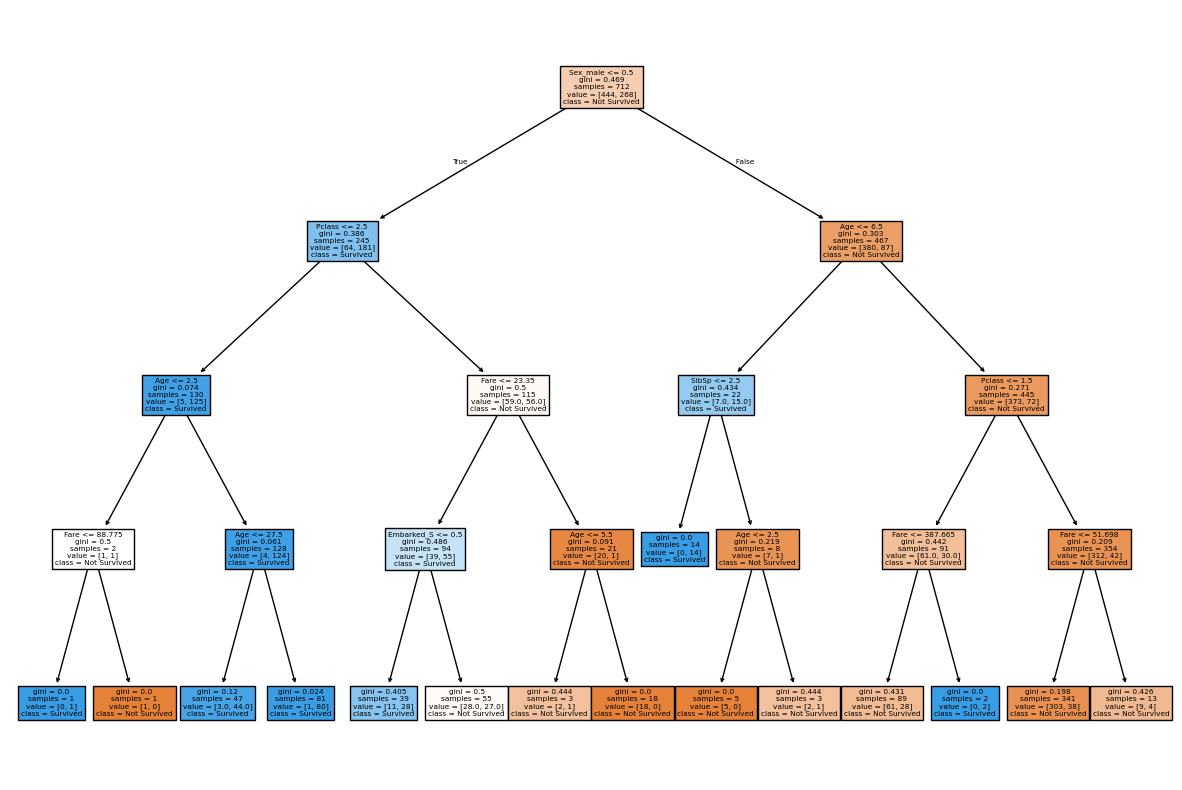

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=["Not Survived","Survived"], filled=True)
plt.show()
